<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
import numpy as np
np.random.normal(loc=5, scale=2, size=10)
# loc to specify the mean, scale to specify the s.d

array([5.45333022, 6.01234147, 2.23725844, 5.28022511, 5.11715039,
       3.22598403, 5.26503677, 4.73393341, 2.65937134, 6.55252336])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

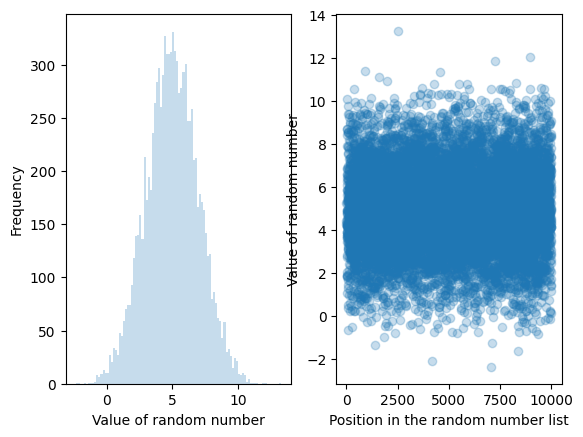

In [2]:
from matplotlib import pyplot as plt
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [3]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

# 68% of the points lie between μ±σ. 

% of points between 1 std.dev. from the mean: 68.00%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [4]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [5]:
import numpy.random as rnd

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

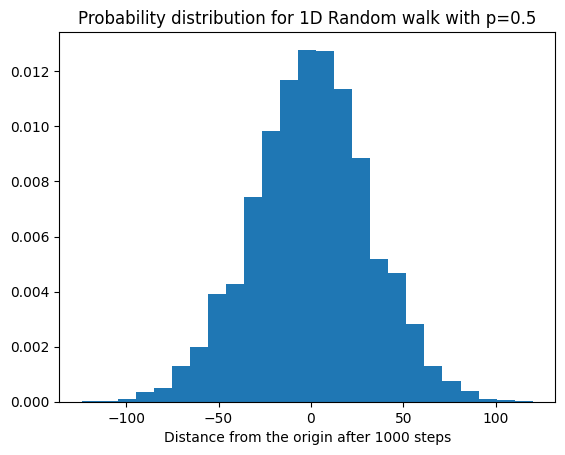

In [6]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
# density = True means that matplotlib will normalise the data under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

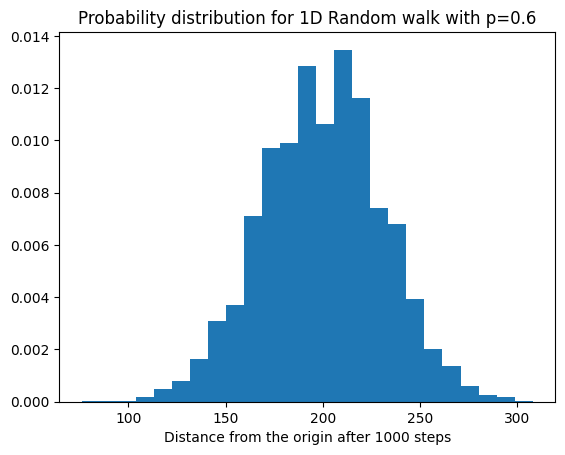

In [7]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
# density = True means that matplotlib will normalise the data under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

# curve shifts to the right

### 1.3 What does theory say?

In [8]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

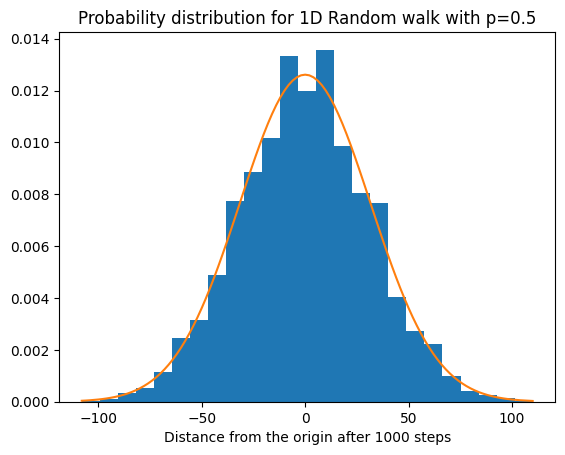

In [9]:
# overlaying normal dist on binomial dist

# original histogram:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
# density = True means that matplotlib will normalise the data under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

# binomial curve:
prob_right=p
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [10]:
# throwing one grain of sand at a time
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.14952

### 2.3 A better solution

In [11]:
# generates multiple random numbers at once
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.138656

### 2.4 A smarter solution

In [12]:
# don't limit expt to only first quad of circle and related square
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.140068

## Exercise 1 :  Vital Stats of Random π

In [47]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / n)
estimate_pi(n=10000)

3.146

In [42]:
x = [estimate_pi(n=10000) for i in range (100)]

np.std(x)

0.014454857176741661

In [43]:
np.mean(x)

3.1443479999999995

In [45]:
# n_values=[10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
# a = []
# for n in n_values:
#     def estimate_pi(n):
#         N_total=1_000_000
#         x=rnd.rand(N_total)
#         y=rnd.rand(N_total)
#         N_green=np.sum((x**2+y**2) <= 1)
#         return 4 * (N_green / N_total)
#     z = estimate_pi(n)
#     a.append(z)
# a

[3.14422, 3.141504, 3.143364, 3.142956, 3.141444, 3.1413]

In [49]:
n_values=[10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
means = []
sd = []
for repeat in n_values:
    y = [estimate_pi(n=repeat) for i in range (100)]
    means.append(np.mean(y))
    sd.append(np.std(y))
sd
means

[3.108,
 3.1332,
 3.1502400000000006,
 3.1413239999999996,
 3.1413063999999995,
 3.1416793999999997]

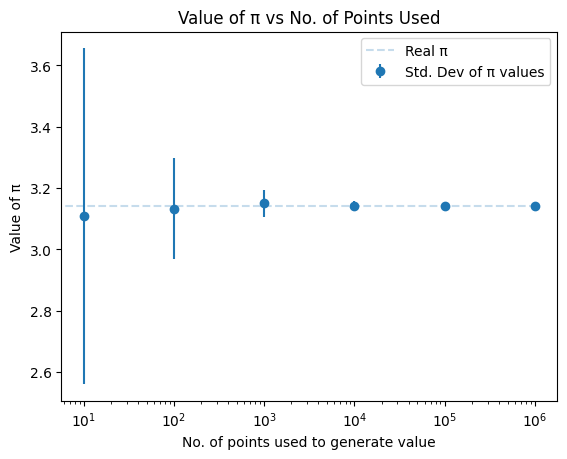

In [51]:
import math
x = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
y = means
plt.errorbar(x, y, yerr=sd, fmt='o', label = 'Std. Dev of π values')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of π')
plt.title('Value of π vs No. of Points Used')

plt.legend(loc='upper right')

plt.hlines(np.pi, 0, x[-1], ls = 'dashed', label = 'Real π', alpha= 0.25)
plt.legend(loc='upper right')

plt.xscale('log')

plt.show()